In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import os

Populating the interactive namespace from numpy and matplotlib


/home/jngaravito57/Documents/codes/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


In [2]:
particles = loadtxt('../coordinates/associations-XYZ.dat',skiprows=6)

In [3]:
def matching(N):
    NN = []
    ll = []
    for i in range(N):  
        l = i/100.
        os.system(('./../../../HackFOF/src/fof -e %f -m 2 < ../coordinates/associations-XYZ.dat')%(l))
        fof_groups = loadtxt('fof.grp', skiprows=1)
        N_match = 0
        id_groups = list(set(fof_groups))
        NN.append(len(id_groups))
        ll.append(l)
    return NN, ll

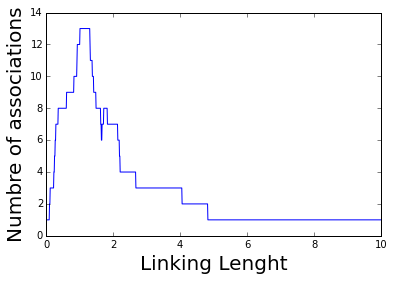

In [8]:
clf()
N, ll = matching(1000)
plot(ll, N)
xlabel("Linking Lenght", fontsize=20)
ylabel("Numbre of associations", fontsize=20)

In [9]:
os.system(('./../../../HackFOF/src/fof -e %f -m 2 < ../coordinates/associations-XYZ.dat')%(1.5))
fof_groups = loadtxt('fof.grp', skiprows=1)

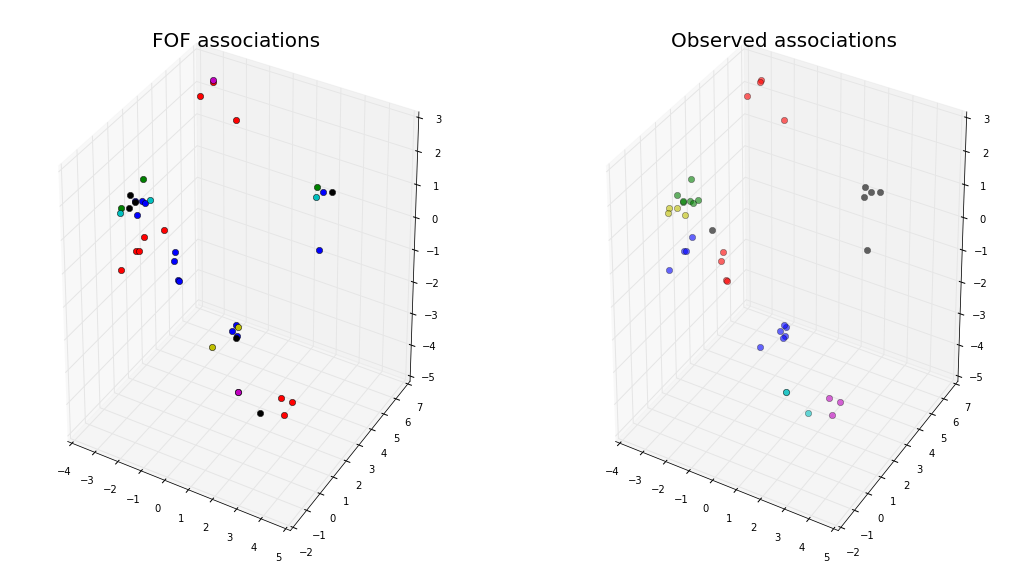

In [16]:
c = ["r", "b", "g", "y", "k", "c", "m", "r", "b", "k"]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121, projection='3d')
title("FOF associations", fontsize=20)

for i in range(10):
    index = where(fof_groups==i)
    index = index[0]
    x_group = particles[index,0]
    y_group = particles[index,1]
    z_group = particles[index,2]
    plot(x_group, y_group, z_group, c=c[i],  ls='*', marker='o')

ax = fig.add_subplot(122, projection='3d')
title("Observed associations", fontsize=20)
for i in range(10):
    index2 = where(particles[:,3]==i)
    index2 = index2[0]
    x_a = particles[index2,0]
    y_a = particles[index2,1]
    z_a = particles[index2,2]
    plot(x_a, y_a, z_a, c=c[i], ls='*', marker='o', alpha=0.6)

In [127]:
### PLaying with FOF ################################
#generates data for 1000 spheres
fileout = open('test_input.dat', 'w')

n_points_total = 200
fileout.write("%d\n"%n_points_total) #points in total 
fileout.write("%d\n"%n_points_total) #points in 'DM'
fileout.write("0\n") #gas
fileout.write("0\n") #stars
fileout.write("0.01\n") # time
fileout.write("0\n") # nactive


for i in range(100):
    x = random.normal(1, 1)
    y = random.normal(1, 1)
    z = random.normal(1, 1)
    fileout.write("%f %f %f\n"%(x,y,z))
for i in range(100):
    x = random.normal(5, 1)
    y = random.normal(5, 1)
    z = random.normal(5, 1)
    fileout.write("%f %f %f\n"%(x,y,z))
fileout.close()
            

In [114]:
!./../../../HackFOF/src/fof -e 0.3 -m 10 < test_input.dat

200
done input


In [105]:
fof_groups = loadtxt('fof.grp', skiprows=1)
test_data = loadtxt('test_input.dat', skiprows=6)

In [106]:
print fof_groups.size 
#print fof_groups #each entry correesponds to the ID of the fof group
id_groups = list(set(fof_groups))
print size(id_groups), 'groups'#this is the number of groups found in the FOF



200
1 groups


In [81]:
c = ["r", "b", "g", "y", "k", "c", "m", "r", "b", "k"]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121, projection='3d')

for i in range(4):
    index = where(fof_groups==i)
    index = index[0]
    x_g = test_data[index,0]
    y_g = test_data[index,1]
    z_g = test_data[index,2]
    plot(x_g, y_g, z_g, c=c[i],  ls='*', marker='o')

ax = fig.add_subplot(122, projection='3d')
x_a = test_data[:,0]
y_a = test_data[:,1]
z_a = test_data[:,2]
plot(x_a, y_a, z_a, ls='*', marker='o', alpha=0.6)